In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,LogisticRegression
from sklearn.metrics import r2_score , mean_squared_error ,confusion_matrix,accuracy_score
import string as st
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
from sklearn.ensemble import RandomForestClassifier
from lib.utils import *
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")


In [2]:
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',200)
df = pd.read_csv("dataset.csv", encoding = 'ISO-8859-1')

In [3]:
df.GAD2

0        0
1        2
2        2
3        0
4        1
        ..
13459    0
13460    3
13461    0
13462    2
13463    1
Name: GAD2, Length: 13464, dtype: int64

In [4]:
df.drop(['S. No.' , 'Timestamp'] , axis = 1 , inplace = True)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GAD1,13464.0,0.860963,0.926542,0.0,0.0,1.0,1.0,3.0
GAD2,13464.0,0.673351,0.915724,0.0,0.0,0.0,1.0,3.0
GAD3,13464.0,0.965761,0.982776,0.0,0.0,1.0,2.0,3.0
GAD4,13464.0,0.724079,0.921971,0.0,0.0,0.0,1.0,3.0
GAD5,13464.0,0.488042,0.837014,0.0,0.0,0.0,1.0,3.0
GAD6,13464.0,0.911022,0.931168,0.0,0.0,1.0,1.0,3.0
GAD7,13464.0,0.588755,0.894408,0.0,0.0,0.0,1.0,3.0
SWL1,13464.0,3.720440,1.736264,1.0,2.0,4.0,5.0,7.0
SWL2,13464.0,4.602050,1.696276,1.0,3.0,5.0,6.0,7.0
SWL3,13464.0,4.345440,1.809430,1.0,3.0,5.0,6.0,7.0


In [6]:
df.dtypes

GAD1                 int64
GAD2                 int64
GAD3                 int64
GAD4                 int64
GAD5                 int64
GAD6                 int64
GAD7                 int64
GADE                object
SWL1                 int64
SWL2                 int64
SWL3                 int64
SWL4                 int64
SWL5                 int64
Game                object
Platform            object
Hours              float64
earnings            object
whyplay             object
League              object
highestleague      float64
streams            float64
SPIN1              float64
SPIN2              float64
SPIN3              float64
SPIN4              float64
SPIN5              float64
SPIN6              float64
SPIN7              float64
SPIN8              float64
SPIN9              float64
SPIN10             float64
SPIN11             float64
SPIN12             float64
SPIN13             float64
SPIN14             float64
SPIN15             float64
SPIN16             float64
S

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13464 entries, 0 to 13463
Data columns (total 53 columns):
GAD1               13464 non-null int64
GAD2               13464 non-null int64
GAD3               13464 non-null int64
GAD4               13464 non-null int64
GAD5               13464 non-null int64
GAD6               13464 non-null int64
GAD7               13464 non-null int64
GADE               12815 non-null object
SWL1               13464 non-null int64
SWL2               13464 non-null int64
SWL3               13464 non-null int64
SWL4               13464 non-null int64
SWL5               13464 non-null int64
Game               13464 non-null object
Platform           13464 non-null object
Hours              13434 non-null float64
earnings           13464 non-null object
whyplay            13464 non-null object
League             11626 non-null object
highestleague      0 non-null float64
streams            13364 non-null float64
SPIN1              13340 non-null float64
S

In [8]:
df.isnull().sum()

GAD1                   0
GAD2                   0
GAD3                   0
GAD4                   0
GAD5                   0
GAD6                   0
GAD7                   0
GADE                 649
SWL1                   0
SWL2                   0
SWL3                   0
SWL4                   0
SWL5                   0
Game                   0
Platform               0
Hours                 30
earnings               0
whyplay                0
League              1838
highestleague      13464
streams              100
SPIN1                124
SPIN2                154
SPIN3                140
SPIN4                159
SPIN5                166
SPIN6                156
SPIN7                138
SPIN8                144
SPIN9                158
SPIN10               160
SPIN11               187
SPIN12               168
SPIN13               187
SPIN14               156
SPIN15               147
SPIN16               147
SPIN17               175
Narcissism            23
Gender                 0


In [9]:
for i in df:
    print('-------------')
    print(df[i].value_counts().head(15))
    print('-------------')

-------------
0    5694
1    5099
2    1520
3    1151
Name: GAD1, dtype: int64
-------------
-------------
0    7616
1    3576
2    1326
3     946
Name: GAD2, dtype: int64
-------------
-------------
0    5319
1    4708
2    2016
3    1421
Name: GAD3, dtype: int64
-------------
-------------
0    7129
1    3884
2    1488
3     963
Name: GAD4, dtype: int64
-------------
-------------
0    9236
1    2576
2     961
3     691
Name: GAD5, dtype: int64
-------------
-------------
0    5386
1    4993
2    1982
3    1103
Name: GAD6, dtype: int64
-------------
-------------
0    8444
1    2961
2    1211
3     848
Name: GAD7, dtype: int64
-------------
-------------
Not difficult at all    6236
Somewhat difficult      5148
Very difficult          1012
Extremely difficult      419
Name: GADE, dtype: int64
-------------
-------------
2    3043
5    2727
6    2218
3    2099
4    1625
1    1333
7     419
Name: SWL1, dtype: int64
-------------
-------------
6    3715
5    2869
4    1724
3    1660
2  

In [10]:
for i in df:
    print('------',i,'------')
    print(df[i].unique()[:30])
    print('-------------')

------ GAD1 ------
[0 1 2 3]
-------------
------ GAD2 ------
[0 2 1 3]
-------------
------ GAD3 ------
[0 2 3 1]
-------------
------ GAD4 ------
[0 2 3 1]
-------------
------ GAD5 ------
[1 0 2 3]
-------------
------ GAD6 ------
[0 1 3 2]
-------------
------ GAD7 ------
[0 1 2 3]
-------------
------ GADE ------
['Not difficult at all' 'Somewhat difficult' 'Very difficult' nan
 'Extremely difficult']
-------------
------ SWL1 ------
[3 2 5 7 6 1 4]
-------------
------ SWL2 ------
[5 6 2 4 3 7 1]
-------------
------ SWL3 ------
[5 2 4 3 6 7 1]
-------------
------ SWL4 ------
[5 2 3 6 1 7 4]
-------------
------ SWL5 ------
[5 1 2 3 7 6 4]
-------------
------ Game ------
['Skyrim' 'Other' 'World of Warcraft' 'League of Legends' 'Starcraft 2'
 'Counter Strike' 'Destiny' 'Diablo 3' 'Heroes of the Storm' 'Hearthstone'
 'Guild Wars 2']
-------------
------ Platform ------
['Console (PS, Xbox, ...)' 'PC' 'Smartphone / Tablet']
-------------
------ Hours ------
[15.  8.  0. 20.  4. 3

In [11]:
for i in df:
    print('------',i,'------')
    print(df[i].nunique())
    print('-------------')

------ GAD1 ------
4
-------------
------ GAD2 ------
4
-------------
------ GAD3 ------
4
-------------
------ GAD4 ------
4
-------------
------ GAD5 ------
4
-------------
------ GAD6 ------
4
-------------
------ GAD7 ------
4
-------------
------ GADE ------
4
-------------
------ SWL1 ------
7
-------------
------ SWL2 ------
7
-------------
------ SWL3 ------
7
-------------
------ SWL4 ------
7
-------------
------ SWL5 ------
7
-------------
------ Game ------
11
-------------
------ Platform ------
3
-------------
------ Hours ------
84
-------------
------ earnings ------
314
-------------
------ whyplay ------
407
-------------
------ League ------
1455
-------------
------ highestleague ------
0
-------------
------ streams ------
65
-------------
------ SPIN1 ------
5
-------------
------ SPIN2 ------
5
-------------
------ SPIN3 ------
5
-------------
------ SPIN4 ------
5
-------------
------ SPIN5 ------
5
-------------
------ SPIN6 ------
5
-------------
------ SPIN7 

In [12]:
df.shape

(13464, 53)

In [13]:
df['Hours_streams'] = df['Hours'] + df['streams']
df.drop(  ((df[df['Hours_streams'] > 115].index) | (df[df['Hours_streams']==0].index)),
                                             axis=0,inplace=True)

In [14]:
df['Hours_streams'].value_counts()

30.0     961
25.0     763
40.0     732
35.0     689
20.0     662
22.0     443
15.0     427
50.0     415
45.0     397
28.0     358
18.0     328
60.0     306
24.0     298
23.0     280
17.0     278
26.0     272
32.0     251
16.0     250
21.0     246
12.0     246
10.0     245
55.0     225
13.0     218
14.0     212
27.0     207
19.0     184
38.0     182
33.0     166
34.0     166
70.0     163
36.0     156
11.0     155
31.0     153
42.0     143
8.0      121
37.0     111
29.0     109
80.0     107
65.0     101
7.0       98
9.0       94
43.0      90
41.0      84
44.0      78
6.0       73
47.0      61
48.0      59
5.0       59
39.0      56
46.0      53
52.0      52
75.0      46
90.0      42
56.0      39
53.0      36
49.0      36
4.0       35
51.0      34
54.0      31
58.0      28
100.0     24
57.0      22
63.0      21
62.0      20
85.0      19
3.0       18
64.0      17
110.0     17
68.0      14
76.0      13
59.0      12
66.0      11
95.0      10
84.0      10
74.0      10
105.0     10
72.0      10

In [15]:
df.GADE.value_counts()

Not difficult at all    6218
Somewhat difficult      5132
Very difficult          1004
Extremely difficult      409
Name: GADE, dtype: int64

In [16]:
df.GADE.fillna(df.GADE.value_counts().index[1] , inplace=True) #1

In [17]:
df.GADE.value_counts()

Not difficult at all    6218
Somewhat difficult      5780
Very difficult          1004
Extremely difficult      409
Name: GADE, dtype: int64

In [18]:
df.shape

(13411, 54)

In [19]:
df.streams.fillna(int(df.streams.mean()) , inplace = True)
df.Hours.fillna(int(df.Hours.mean()) , inplace = True)

In [20]:
df.drop('Hours_streams' , axis = 1 , inplace = True)

In [21]:
print(df.League.nunique())
df.League = df.League.str.lower().str.strip()
print(df.League.nunique())

1444
1199


In [22]:
df["League"].value_counts().head(50)

gold            1347
silver           899
platinum         838
diamond          728
unranked         393
gold 3           265
gold 1           264
diamond 5        264
gold 5           263
silver 1         250
gold v           227
silver 2         219
gold 2           218
silver 3         199
bronze           191
platinum 3       159
gold 4           156
platinum 1       143
platinum 2       138
silver 4         138
platinum 5       128
silver 5         121
diamond v        110
platinum 4       102
plat             100
diamond 4         96
diamond 3         96
platinum v        89
plat 5            87
plat 3            84
gold iv           82
diamond 1         75
master            74
plat 2            72
gold iii          69
bronze 1          69
silver iii        68
plat 1            67
plat 4            62
diamond 2         61
silver v          59
silver iv         59
bronze 2          58
bronze 3          55
challenger        53
silver i          52
silver ii         50
platinum iv  

In [23]:
df["League"] =df["League"].str.extract(r'^([a-z]+)')

In [24]:
df.League.nunique()

207

In [25]:
df.League.unique()

array([nan, 'gold', 'none', 'na', 'diamond', 'not', 'bronze', 'silver',
       'n', 'unranked', 'bad', 'legendary', 'global', 'potato', 'master',
       'silverii', 'platinum', 'masters', 'challenger', 'lvl', 'platin',
       'promos', 'top', 'd', 'plat', 'i', 'rank', 'grandmaster',
       'platnium', 's', 'haven', 'platinium', 'in', 'gv', 'provisional',
       'placements', 'g', 'was', 'the', 'division', 'pplatinum', 'hr',
       'only', 'platium', 'legend', 'platine', 'plarinum', 'dmg',
       'sliver', 'dont', 'high', 'very', 'starcraft', 'challenjour',
       'fusion', 'low', 'unraked', 'havent', 'got', 'golden', 'cs', 'p',
       'standard', 'still', 'highest', 'nope', 'dia', 'league', 'nova',
       'mge', 'silber', 'siver', 'never', 'b', 'platinun', 'mg',
       'supreme', 'for', 'greater', 'wood', 'le', 'no', 'natural', 'aram',
       'don', 'currently', 'noone', 'grand', 'hs', 'current', 'last',
       'first', 'recently', 'fucking', 'grandmasters', 'golf', 'of',
       'glod'

In [26]:
df.loc[(df['whyplay']== 'having fun') ,'League'] =df.loc[(df['whyplay']== 'having fun') ,'League'].fillna('unranked')
df.League.fillna('gold' , inplace = True)

In [27]:
golds = ['g', 'gv', 'golden' ,'glod' ,'golld' ,'golf', 'goled', 'golderino' ,'giii']
df['League'] = df.League.replace(golds , 'gold')

In [28]:
silvers = [ 'silverii' , 's' , 'sliver' , 'siver' , 'silber' , 'sil' , 'silveriv']
df['League'] = df.League.replace(silvers , 'silver')

In [29]:
plats = [
    'platinium' , 'platnium' , 'platin' ,'pplatinum' ,'plarinum' ,'platium', 'p' ,'platine' ,
    'platinun' ,'platonum' ,'platnum', 'plata' ,'plantinum',
    'platinuim' ,'platunum', 'plantinum' ,'platunum' ,'platinumm' ,'platv' ,'platina' , 'plat' 
]
df['League'] = df.League.replace(plats , 'platinum')

In [30]:
bronzers = ['bronce' , 'b' , 'broze' ,'lowest' , 'wood', 'elohell'] 
df['League'] = df.League.replace(bronzers , 'bronze')

In [31]:
unranked = ['none' ,'na', 'not' ,'n' ,'promos' ,'provisional' ,'placements' , 'dont' , 'was', 'unraked',
            'havent', 'never', 'nope', 'no', 'noone', 'don', 'of', 'unrranked', 'new', 'what', 'unrank' ,
            'ranked', 'placement', 'unrankt' , 'non', 'unfranked' , 'promotion', 'idk',
            'unplaced', 'probably', 'provisionals', 'didnt' ,'unrakned' , 'unfinished' , 'just' , 'x' ,
            'promotions' , 'unseeded' , 'haven']
df['League'] = df.League.replace(unranked , 'unranked')

In [32]:
diamonds =  ['d', 'dia', 'diaomnd', 'diamont','diamomd']
df['League'] = df.League.replace(diamonds , 'diamond')

In [33]:
gm =  ['grand', 'gm', 'grandmasters']
df['League'] = df.League.replace(gm , 'grandmaster')

In [34]:
chall =  ['challenjour', 'c', 'charrenjour', 'challeneger']
df['League'] = df.League.replace(chall , 'challenger')

In [35]:
df['League'] = df.League.replace('mg' , 'mge')
df['League'] = df.League.replace('masters' , 'master')
df['League'] = df.League.replace( ['le', 'legdendary'] , 'legendary')

In [36]:
df.League.value_counts()

gold             4074
platinum         2640
silver           2278
unranked         1714
diamond          1628
bronze            552
master            163
challenger         76
rank               28
i                  20
grandmaster        17
dmg                11
currently          11
legendary           8
season              8
mge                 8
high                8
league              7
lol                 7
in                  7
still               7
legend              6
top                 6
cs                  6
nova                5
greater             4
supreme             4
starcraft           3
last                3
lem                 3
csgo                3
sc                  2
finished            2
low                 2
the                 2
mid                 2
ugc                 2
global              2
eu                  2
aram                2
division            2
got                 2
level               2
used                2
for                 2
peaked    

In [37]:
counts = df['League'].value_counts()
df['League'] = df['League'][~df['League'].isin(counts[counts < 3].index)]

In [38]:
df['League'] = df.League.replace(['i' , 'currently' , 'high' , 'season' , 'lol','cs' ,
                                  'last' ,'csgo','starcraft' ,'geater' , 'in', 'rank' , 'still'] , np.nan)

In [39]:
df.League.fillna('unspecified' , inplace=True)

In [40]:
df.League.unique()

array(['unranked', 'gold', 'diamond', 'bronze', 'silver', 'unspecified',
       'legendary', 'master', 'platinum', 'challenger', 'top',
       'grandmaster', 'legend', 'dmg', 'league', 'nova', 'mge', 'supreme',
       'greater', 'lem'], dtype=object)

In [41]:
df.League.value_counts()

gold           4074
platinum       2640
silver         2278
unranked       1714
diamond        1628
bronze          552
unspecified     207
master          163
challenger       76
grandmaster      17
dmg              11
legendary         8
mge               8
league            7
top               6
legend            6
nova              5
greater           4
supreme           4
lem               3
Name: League, dtype: int64

In [42]:
df['Narcissism'].value_counts()

1.0    5240
2.0    4344
3.0    2335
4.0    1147
5.0     322
Name: Narcissism, dtype: int64

In [43]:
df.drop(["Birthplace","Birthplace_ISO3"],axis=1,inplace=True)

In [44]:
df['Residence'] = df['Residence'].replace('Unknown',df['Residence'].mode()[0])

In [45]:
df['Reference'].fillna('Other',inplace=True)

In [46]:
df.drop(df[df['accept'].isnull()].index , axis=0 , inplace=True)


In [47]:
df['Residence_ISO3'].fillna('USA',inplace=True) #11063

In [48]:
df.loc[11063,'Residence_ISO3'] = 'XXK'

In [49]:
col = ['SPIN1','SPIN2','SPIN3','SPIN4','SPIN5','SPIN6','SPIN7','SPIN8','SPIN9',
     'SPIN10','SPIN11','SPIN12','SPIN13','SPIN14','SPIN15','SPIN16','SPIN17' ,'SPIN_T']
for i in col :
    df[i].fillna(df[i].mode()[0], inplace = True)

In [50]:
df['Playstyle'] = df['Playstyle'].apply(lambda x: ' '.join(word.strip(st.punctuation) for word in x.split()))
df['earnings'] = df['earnings'].apply(lambda x: ' '.join(word.strip(st.punctuation) for word in x.split()))
df['whyplay'] = df['whyplay'].apply(lambda x: ' '.join(word.strip(st.punctuation) for word in x.split()))


In [51]:
df['Playstyle'] = df['Playstyle'].str.lower().str.strip()
df['whyplay'] = df['whyplay'].str.lower().str.strip()
df['earnings'] = df['earnings'].str.lower().str.strip()

In [52]:
df['Playstyle'].nunique()

278

In [53]:
df.drop('highestleague' , axis = 1 , inplace = True)

In [54]:
df.head(7)

,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,SWL1,SWL2,SWL3,SWL4,SWL5,Game,Platform,Hours,earnings,whyplay,League,streams,SPIN1,SPIN2,SPIN3,SPIN4,SPIN5,SPIN6,SPIN7,SPIN8,SPIN9,SPIN10,SPIN11,SPIN12,SPIN13,SPIN14,SPIN15,SPIN16,SPIN17,Narcissism,Gender,Age,Work,Degree,Residence,Reference,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3
0,0,0,0,0,1,0,0,Not difficult at all,3,5,5,5,5,Skyrim,"Console (PS, Xbox, ...)",15.0,i play for fun,having fun,unranked,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,Male,25,Unemployed / between jobs,Bachelor (or equivalent),USA,Reddit,singleplayer,Accept,1,23,5.0,USA
1,1,2,2,2,0,1,0,Somewhat difficult,3,5,2,5,1,Other,PC,8.0,i play for fun,having fun,unranked,2.0,2.0,1.0,1.0,3.0,2.0,3.0,1.0,3.0,4.0,0.0,3.0,0.0,1.0,3.0,3.0,1.0,2.0,1.0,Male,41,Unemployed / between jobs,Bachelor (or equivalent),USA,Reddit,multiplayer online with strangers,Accept,8,16,33.0,USA
3,0,0,0,0,0,0,0,Not difficult at all,2,5,5,3,2,Other,PC,20.0,i play for fun,improving,gold,5.0,2.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,2.0,Male,28,Employed,Bachelor (or equivalent),USA,Reddit,multiplayer online with online acquaintances...,Accept,0,17,11.0,USA
4,2,1,2,2,2,3,2,Very difficult,2,2,4,5,1,Other,"Console (PS, Xbox, ...)",20.0,i play for fun,having fun,unranked,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,Male,19,Employed,High school diploma (or equivalent),South Korea,Reddit,multiplayer online with strangers,Accept,14,14,13.0,KOR
5,0,0,0,0,0,1,0,Not difficult at all,3,5,3,3,3,Other,"Console (PS, Xbox, ...)",4.0,i play for fun,relaxing,gold,0.0,1.0,1.0,2.0,3.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,Male,24,Employed,Bachelor (or equivalent),USA,Reddit,multiplayer online with real life friends,Accept,1,17,13.0,USA
6,0,0,0,0,0,0,0,Not difficult at all,3,4,4,3,2,Other,PC,30.0,i play for fun,relaxing,gold,8.0,1.0,2.0,2.0,3.0,1.0,1.0,1.0,2.0,3.0,1.0,3.0,1.0,0.0,1.0,2.0,1.0,1.0,2.0,Male,29,Employed,High school diploma (or equivalent),USA,Reddit,multiplayer online with online acquaintances...,Accept,0,16,26.0,USA
7,0,0,0,0,0,0,0,Somewhat difficult,3,6,4,3,7,Other,"Console (PS, Xbox, ...)",25.0,i play for fun,having fun,unranked,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,Female,23,Employed,Bachelor (or equivalent),Japan,Reddit,singleplayer,Accept,0,23,14.0,JPN


In [55]:
df.isnull().sum()

GAD1               0
GAD2               0
GAD3               0
GAD4               0
GAD5               0
GAD6               0
GAD7               0
GADE               0
SWL1               0
SWL2               0
SWL3               0
SWL4               0
SWL5               0
Game               0
Platform           0
Hours              0
earnings           0
whyplay            0
League             0
streams            0
SPIN1              0
SPIN2              0
SPIN3              0
SPIN4              0
SPIN5              0
SPIN6              0
SPIN7              0
SPIN8              0
SPIN9              0
SPIN10             0
SPIN11             0
SPIN12             0
SPIN13             0
SPIN14             0
SPIN15             0
SPIN16             0
SPIN17             0
Narcissism        23
Gender             0
Age                0
Work              37
Degree             0
Residence          0
Reference          0
Playstyle          0
accept             0
GAD_T              0
SWL_T        

In [56]:
df.Work.fillna(df.Work.mode()[0] , inplace=True)

In [57]:
df.drop(['Residence' , 'accept'] , axis = 1 , inplace = True)

In [58]:
df.dtypes

GAD1                int64
GAD2                int64
GAD3                int64
GAD4                int64
GAD5                int64
GAD6                int64
GAD7                int64
GADE               object
SWL1                int64
SWL2                int64
SWL3                int64
SWL4                int64
SWL5                int64
Game               object
Platform           object
Hours             float64
earnings           object
whyplay            object
League             object
streams           float64
SPIN1             float64
SPIN2             float64
SPIN3             float64
SPIN4             float64
SPIN5             float64
SPIN6             float64
SPIN7             float64
SPIN8             float64
SPIN9             float64
SPIN10            float64
SPIN11            float64
SPIN12            float64
SPIN13            float64
SPIN14            float64
SPIN15            float64
SPIN16            float64
SPIN17            float64
Narcissism        float64
Gender      

In [59]:
df.earnings.replace(df.earnings.value_counts().index[3:] , 'Other',inplace=True)
df['earnings'].value_counts()

i play for fun                                                                           11708
i play mostly for fun but earn a little on the side tournament winnings streaming etc      957
Other                                                                                      294
i earn a living by playing this game                                                        39
Name: earnings, dtype: int64

In [60]:
df.whyplay.replace(df.whyplay.value_counts().index[5:] , 'Other',inplace=True)
df['whyplay'].value_counts()

having fun          5138
improving           4728
winning             2018
relaxing             630
Other                428
all of the above      56
Name: whyplay, dtype: int64

In [61]:
df.Playstyle.replace(df.Playstyle.value_counts().index[5:] , 'Other',inplace=True)
df['Playstyle'].value_counts()

multiplayer  online  with real life friends                    5428
multiplayer  online  with strangers                            3969
multiplayer  online  with online acquaintances or teammates    2545
singleplayer                                                    720
Other                                                           292
multiplayer  offline people in the same room                     44
Name: Playstyle, dtype: int64

In [62]:
df.Playstyle.replace('Other' , np.nan , inplace=True)
df.whyplay.replace('Other' , np.nan , inplace=True)
df.earnings.replace('Other' , np.nan , inplace=True)

In [63]:
df.isnull().sum()

GAD1                0
GAD2                0
GAD3                0
GAD4                0
GAD5                0
GAD6                0
GAD7                0
GADE                0
SWL1                0
SWL2                0
SWL3                0
SWL4                0
SWL5                0
Game                0
Platform            0
Hours               0
earnings          294
whyplay           428
League              0
streams             0
SPIN1               0
SPIN2               0
SPIN3               0
SPIN4               0
SPIN5               0
SPIN6               0
SPIN7               0
SPIN8               0
SPIN9               0
SPIN10              0
SPIN11              0
SPIN12              0
SPIN13              0
SPIN14              0
SPIN15              0
SPIN16              0
SPIN17              0
Narcissism         23
Gender              0
Age                 0
Work                0
Degree              0
Reference           0
Playstyle         292
GAD_T               0
SWL_T     

In [64]:
df.dropna(inplace=True)

In [65]:
df.shape

(12081, 48)

In [66]:
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.weight'] = 'bold'

In [67]:
df.head(2)

,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,SWL1,SWL2,SWL3,SWL4,SWL5,Game,Platform,Hours,earnings,whyplay,League,streams,SPIN1,SPIN2,SPIN3,SPIN4,SPIN5,SPIN6,SPIN7,SPIN8,SPIN9,SPIN10,SPIN11,SPIN12,SPIN13,SPIN14,SPIN15,SPIN16,SPIN17,Narcissism,Gender,Age,Work,Degree,Reference,Playstyle,GAD_T,SWL_T,SPIN_T,Residence_ISO3
0,0,0,0,0,1,0,0,Not difficult at all,3,5,5,5,5,Skyrim,"Console (PS, Xbox, ...)",15.0,i play for fun,having fun,unranked,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,Male,25,Unemployed / between jobs,Bachelor (or equivalent),Reddit,singleplayer,1,23,5.0,USA
1,1,2,2,2,0,1,0,Somewhat difficult,3,5,2,5,1,Other,PC,8.0,i play for fun,having fun,unranked,2.0,2.0,1.0,1.0,3.0,2.0,3.0,1.0,3.0,4.0,0.0,3.0,0.0,1.0,3.0,3.0,1.0,2.0,1.0,Male,41,Unemployed / between jobs,Bachelor (or equivalent),Reddit,multiplayer online with strangers,8,16,33.0,USA


In [68]:
df.columns

Index(['GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7', 'GADE', 'SWL1',
       'SWL2', 'SWL3', 'SWL4', 'SWL5', 'Game', 'Platform', 'Hours', 'earnings',
       'whyplay', 'League', 'streams', 'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4',
       'SPIN5', 'SPIN6', 'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10', 'SPIN11',
       'SPIN12', 'SPIN13', 'SPIN14', 'SPIN15', 'SPIN16', 'SPIN17',
       'Narcissism', 'Gender', 'Age', 'Work', 'Degree', 'Reference',
       'Playstyle', 'GAD_T', 'SWL_T', 'SPIN_T', 'Residence_ISO3'],
      dtype='object')

In [69]:
from sklearn.preprocessing import MinMaxScaler

In [70]:
cols = ['Hours' , 'streams' ,'Age','GAD_T', 'SWL_T', 'SPIN_T']
sc = MinMaxScaler()

In [71]:
df[cols] = sc.fit_transform(df[cols])

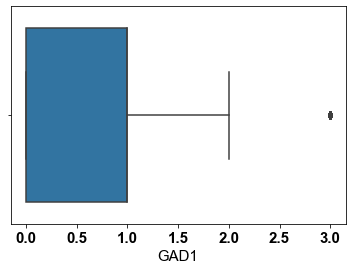

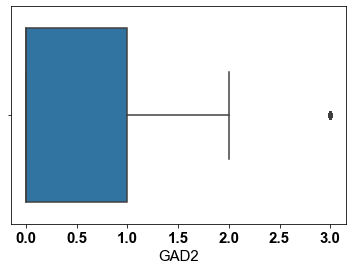

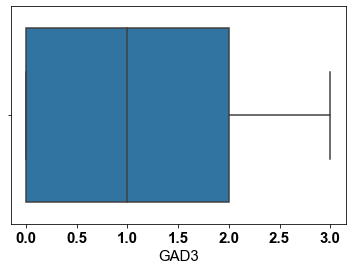

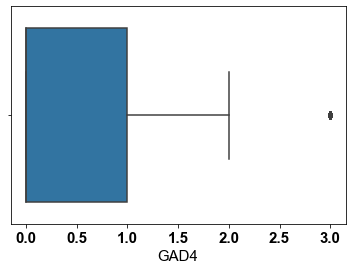

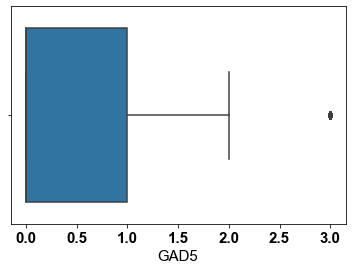

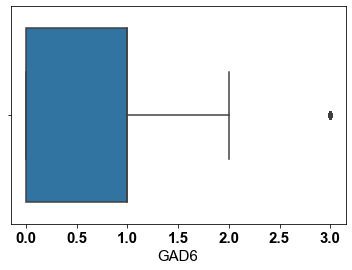

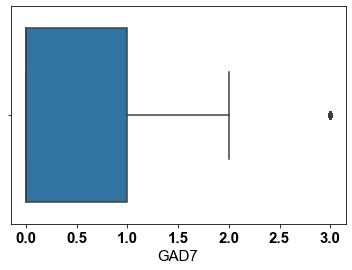

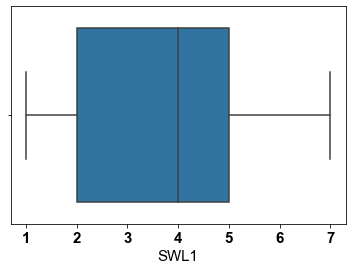

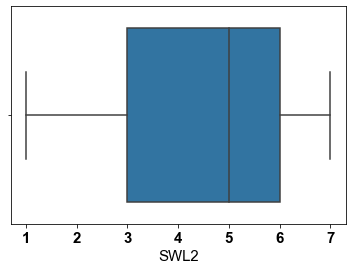

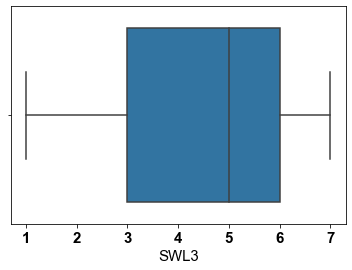

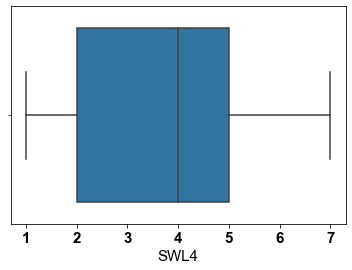

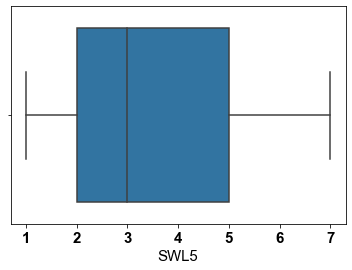

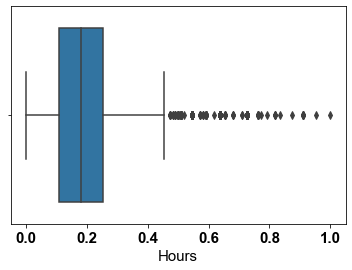

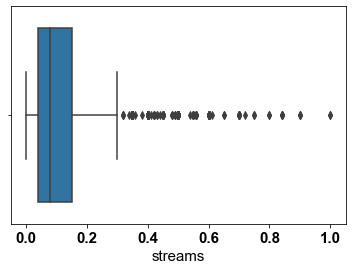

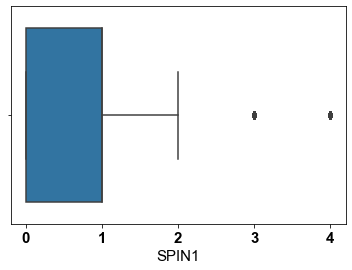

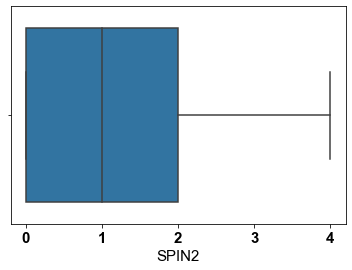

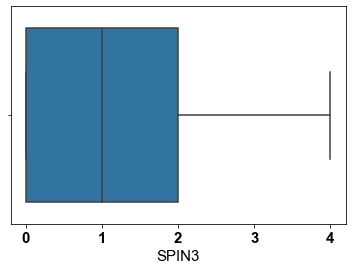

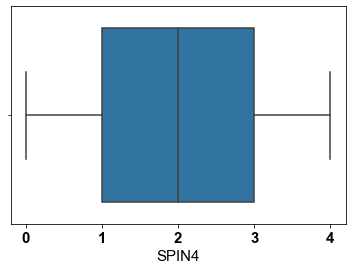

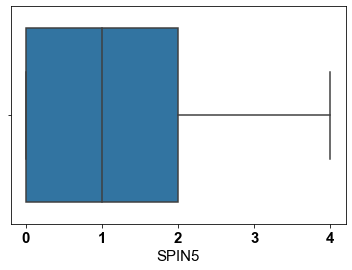

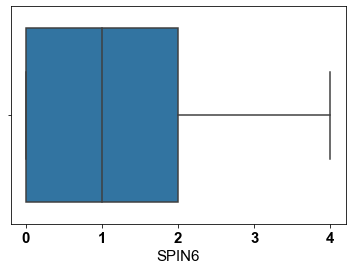

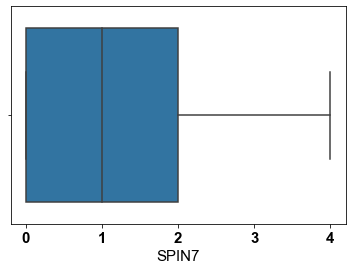

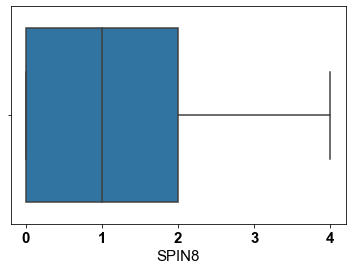

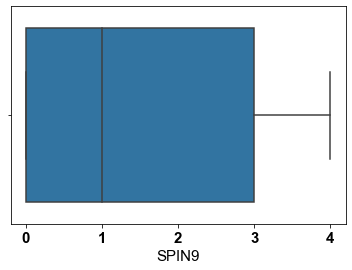

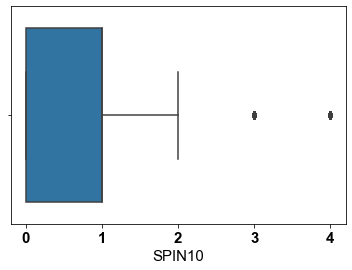

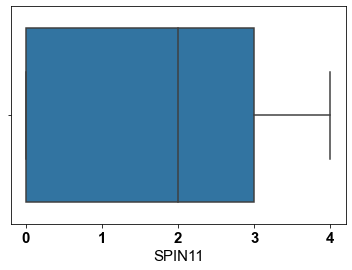

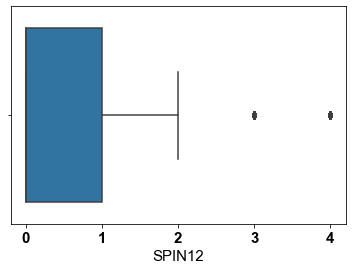

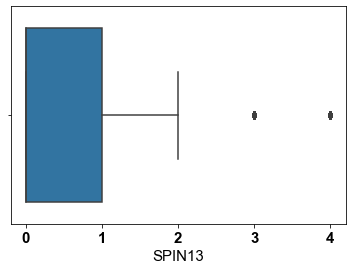

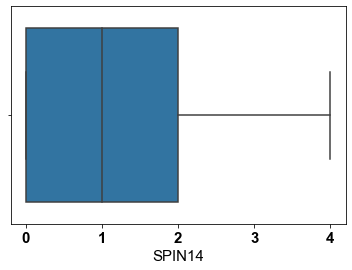

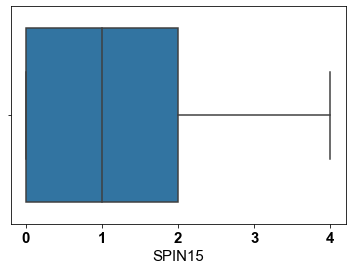

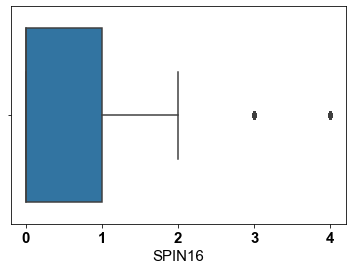

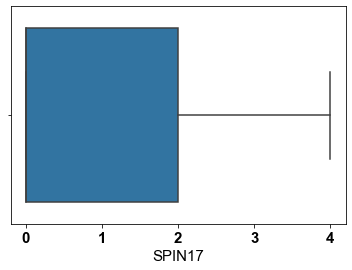

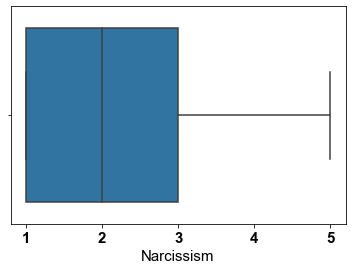

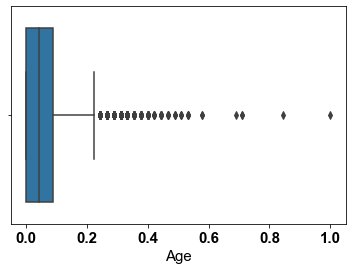

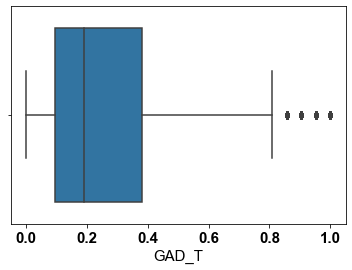

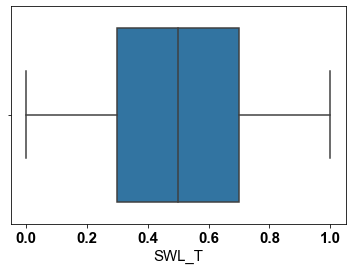

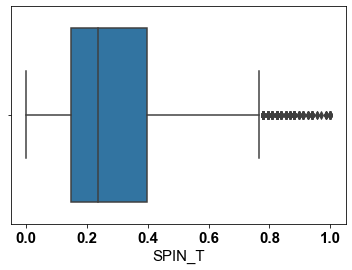

In [72]:
for i in df:
    if df[i].dtype != 'object':
        sns.boxplot(df[i])
        plt.show()

In [73]:
df.drop( df[df['Age'] > 50].index , axis = 0 , inplace=True)

In [74]:
corr = df.corr(method='spearman')


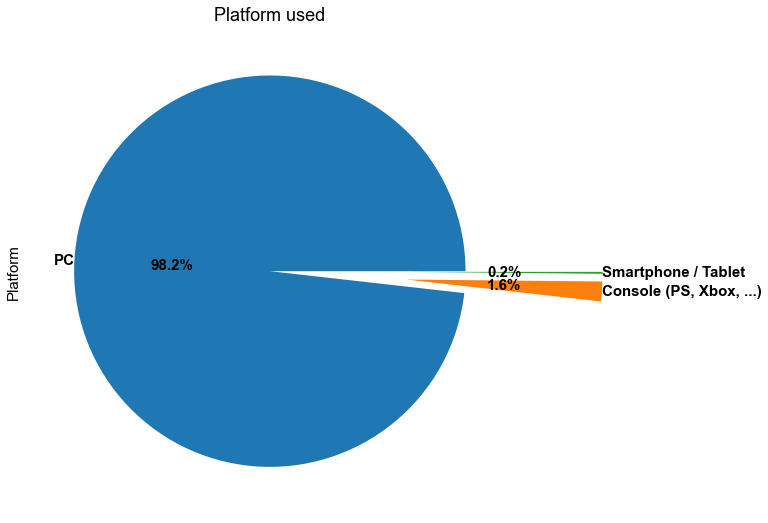

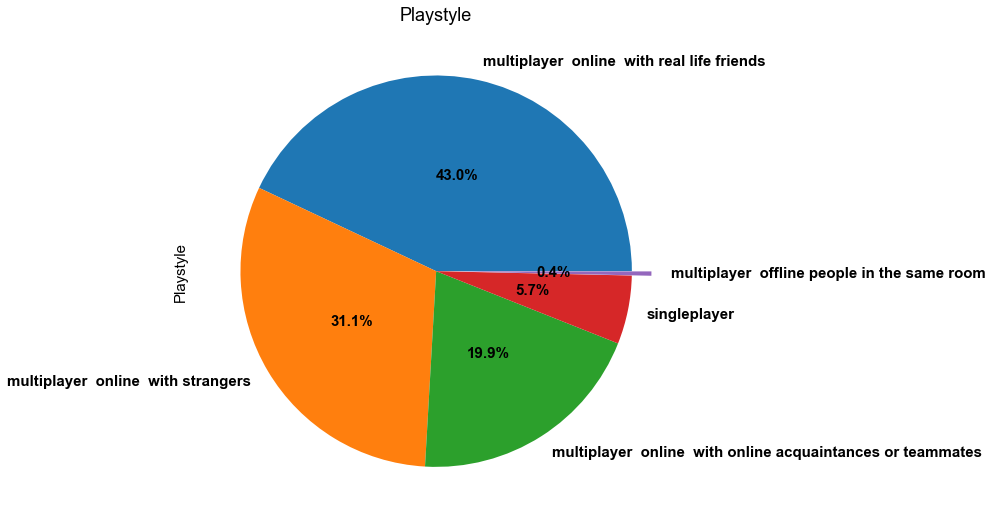

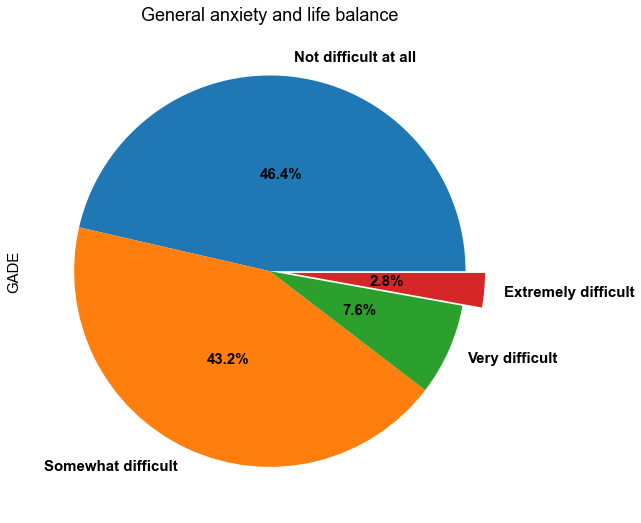

In [75]:
plt.figure(figsize=(9,9))
myexplode = [0, 0.7, 0.7]
df.Platform.value_counts().plot(kind = 'pie' , autopct='%1.1f%%' , pctdistance=0.5, labeldistance=1 , explode=myexplode )
plt.title("Platform used")
plt.show()

plt.figure(figsize=(9,9))
myexplode = [0,0,0,0,0.1]
df.Playstyle.value_counts().head(5).plot(kind = 'pie' , autopct='%1.1f%%' , pctdistance=0.5 , explode=myexplode )
plt.title("Playstyle")
plt.show()

plt.figure(figsize=(9,9))
myexplode = [0,0,0,0.1]
df.GADE.value_counts().head(5).plot(kind = 'pie' , autopct='%1.1f%%' , pctdistance=0.5 , explode=myexplode )
plt.title("General anxiety and life balance")
plt.show()

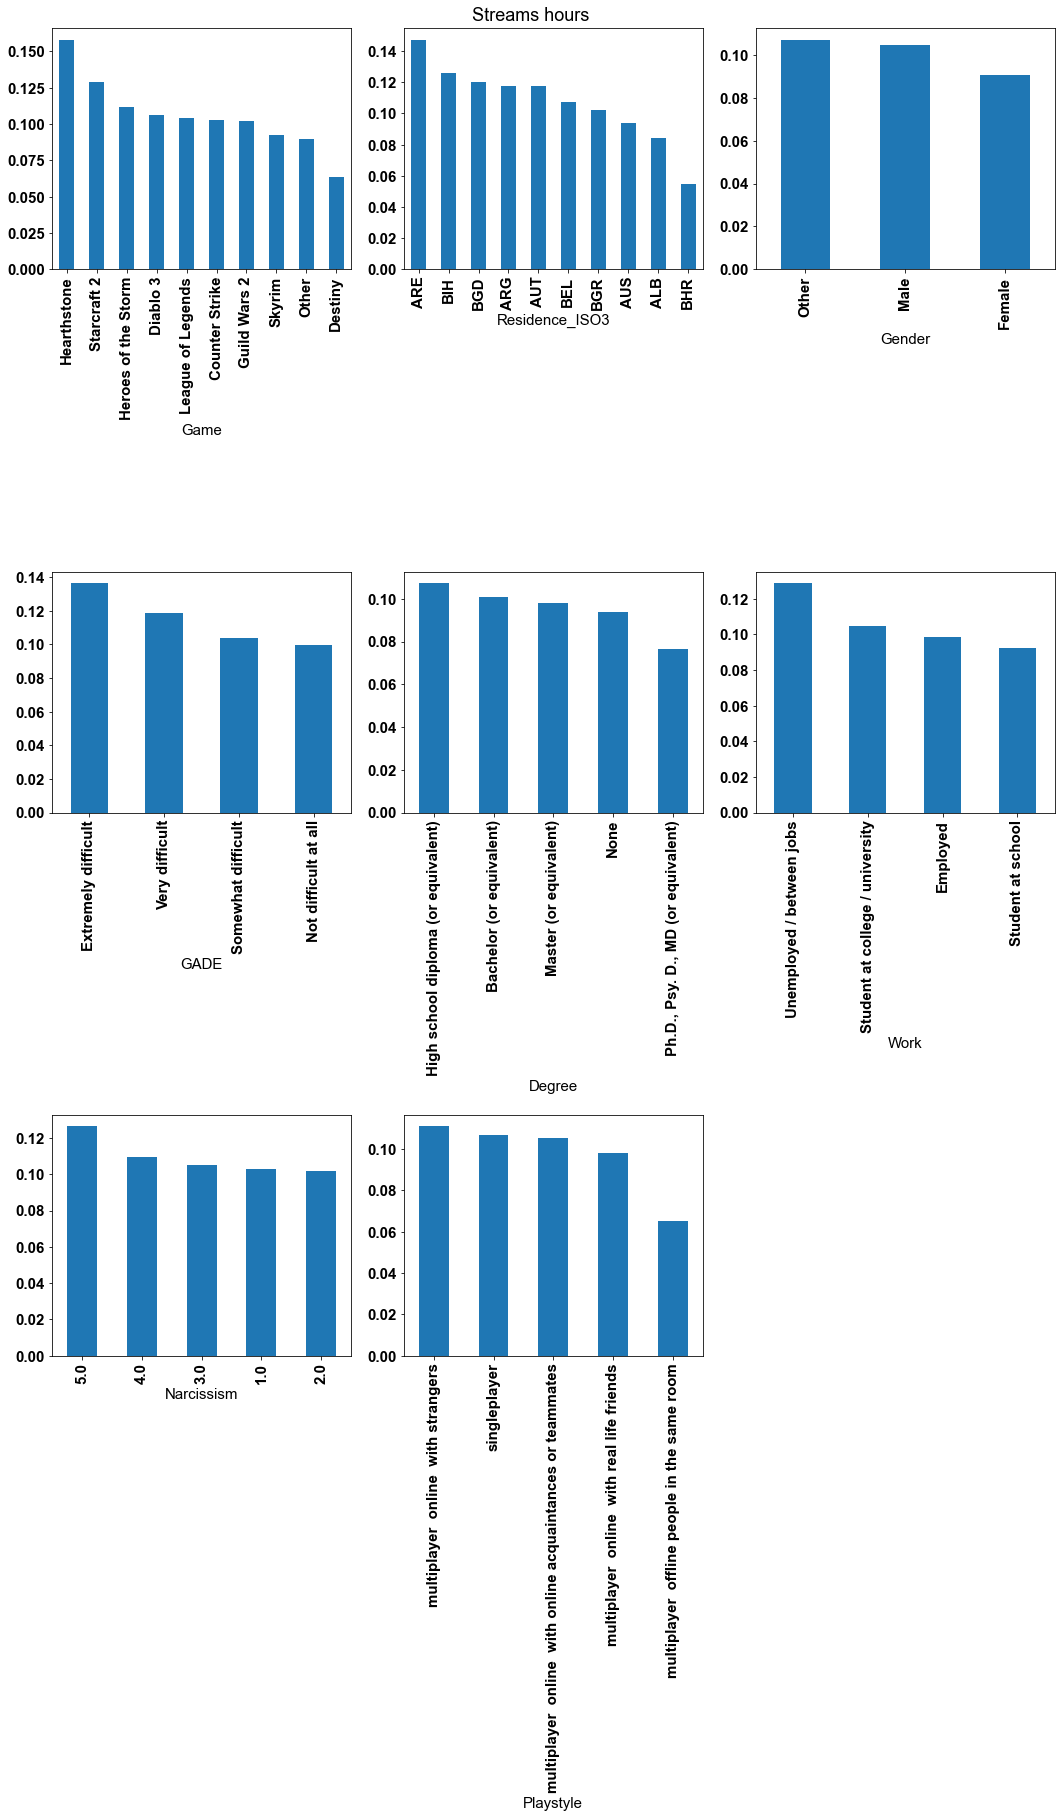

In [76]:
labels = ['Game', 'Residence_ISO3' , 'Gender','GADE' , 'Degree' , 'Work','Narcissism','Playstyle']
plt.figure(figsize=(15,20))
plt.suptitle('Streams hours')
for count, ele in enumerate(labels,1):
    plt.subplot(3 , 3 , count)
    plt.tight_layout()
    df.groupby(ele)['streams'].mean().head(10).sort_values(ascending=False).plot(kind='bar')
plt.show()

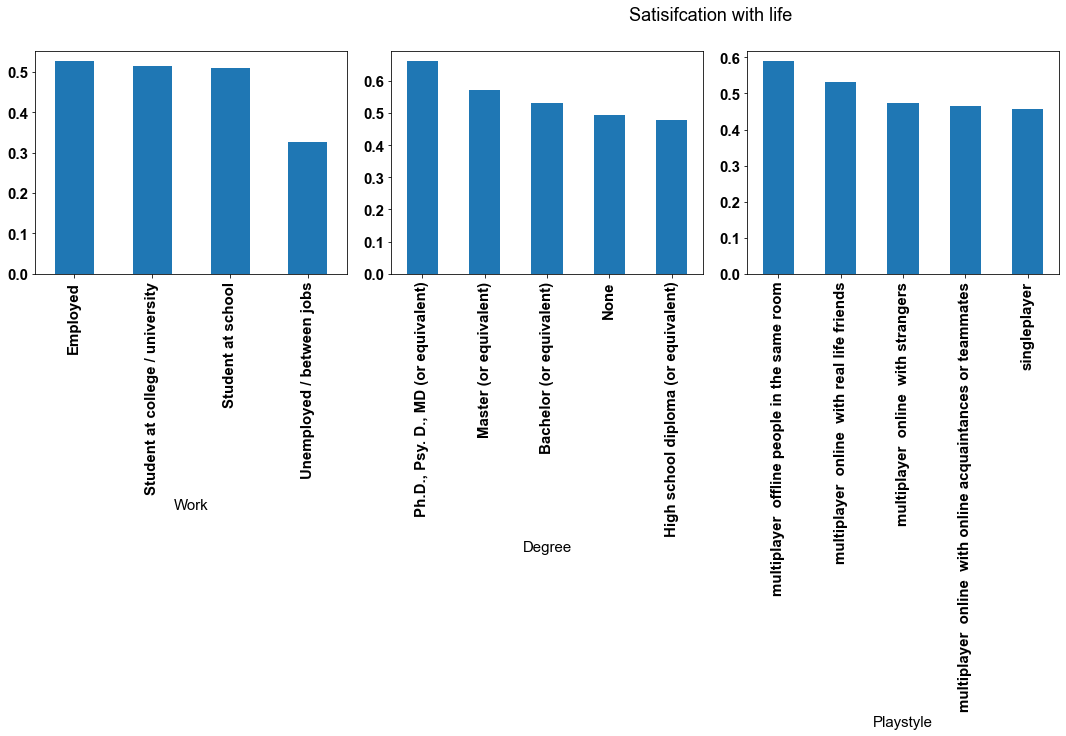

In [77]:
labels = ['Work', 'Degree' , 'Playstyle']
plt.figure(figsize=(20,8))
plt.suptitle('Satisifcation with life')
for count, ele in enumerate(labels,1):
    plt.subplot(1 , 4 , count)
    plt.tight_layout()
    df.groupby(ele)['SWL_T'].mean().head(10).sort_values(ascending=False).plot(kind='bar')
plt.show()

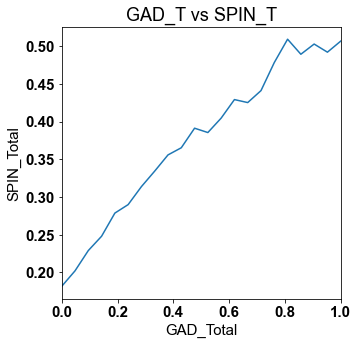

In [78]:
plt.figure(figsize=(5,5))
df.groupby('GAD_T')['SPIN_T'].mean().plot()
plt.title("GAD_T vs SPIN_T")
plt.xlabel("GAD_Total")
plt.ylabel("SPIN_Total")
plt.show()

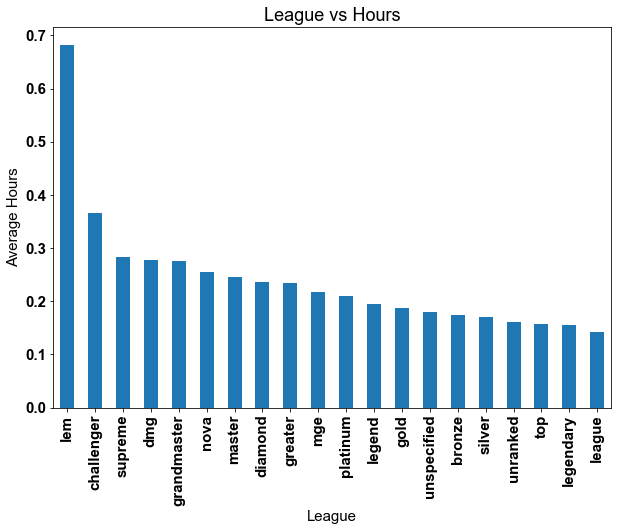

In [79]:
plt.figure(figsize=(10,7))
df.groupby('League').mean()['Hours'].sort_values(ascending=False).plot(kind='bar')
plt.title("League vs Hours")
plt.xlabel("League")
plt.ylabel("Average Hours")
plt.show()

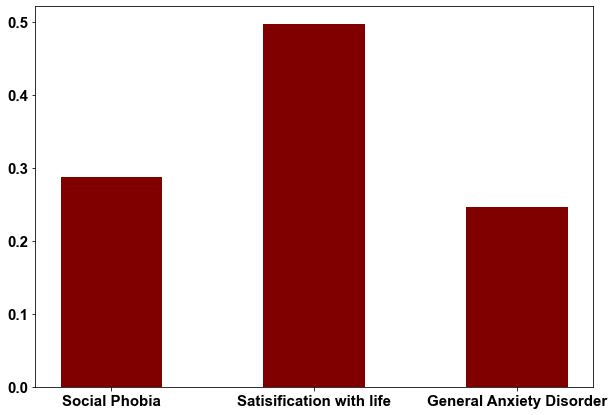

In [80]:
x=df.SPIN_T.mean()
y = df.SWL_T.mean()
z = df.GAD_T.mean()
c=[x,y,z]
plt.figure(figsize=(10,7))
plt.bar(['Social Phobia','Satisification with life','General Anxiety Disorder'],c,color ='maroon',
        width = 0.5)
plt.show()

In [81]:
le = LabelEncoder()

In [82]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = le.fit_transform(df[i])

In [83]:
df.head()

,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,SWL1,SWL2,SWL3,SWL4,SWL5,Game,Platform,Hours,earnings,whyplay,League,streams,SPIN1,SPIN2,SPIN3,SPIN4,SPIN5,SPIN6,SPIN7,SPIN8,SPIN9,SPIN10,SPIN11,SPIN12,SPIN13,SPIN14,SPIN15,SPIN16,SPIN17,Narcissism,Gender,Age,Work,Degree,Reference,Playstyle,GAD_T,SWL_T,SPIN_T,Residence_ISO3
0,0,0,0,0,1,0,0,1,3,5,5,5,5,8,0,0.136364,1,1,18,0.00,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1,0.155556,3,0,2,4,0.047619,0.600000,0.073529,102
1,1,2,2,2,0,1,0,2,3,5,2,5,1,7,1,0.072727,1,1,18,0.02,2.0,1.0,1.0,3.0,2.0,3.0,1.0,3.0,4.0,0.0,3.0,0.0,1.0,3.0,3.0,1.0,2.0,1.0,1,0.511111,3,0,2,3,0.380952,0.366667,0.485294,102
3,0,0,0,0,0,0,0,1,2,5,5,3,2,7,1,0.181818,1,2,4,0.05,2.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0.222222,0,0,2,1,0.000000,0.400000,0.161765,102
4,2,1,2,2,2,3,2,3,2,2,4,5,1,7,0,0.181818,1,1,18,0.01,2.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,1,0.022222,0,1,2,3,0.666667,0.300000,0.191176,56
5,0,0,0,0,0,1,0,1,3,5,3,3,3,7,0,0.036364,1,3,4,0.00,1.0,1.0,2.0,3.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,1,0.133333,0,0,2,2,0.047619,0.400000,0.191176,102


In [84]:
df.head(1)

,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,SWL1,SWL2,SWL3,SWL4,SWL5,Game,Platform,Hours,earnings,whyplay,League,streams,SPIN1,SPIN2,SPIN3,SPIN4,SPIN5,SPIN6,SPIN7,SPIN8,SPIN9,SPIN10,SPIN11,SPIN12,SPIN13,SPIN14,SPIN15,SPIN16,SPIN17,Narcissism,Gender,Age,Work,Degree,Reference,Playstyle,GAD_T,SWL_T,SPIN_T,Residence_ISO3
0,0,0,0,0,1,0,0,1,3,5,5,5,5,8,0,0.136364,1,1,18,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1,0.155556,3,0,2,4,0.047619,0.6,0.073529,102


In [85]:
df1 = df[['GAD_T'  , 'SWL_T' , 'SPIN_T' ]]
df2 = df[[ 'Age' ,  'Hours' , 'streams' ]]

In [86]:
pc1 = PCA(n_components=2)
pc2 = PCA(n_components=2)

In [87]:
x1 = pc1.fit_transform(df1)
x2 = pc2.fit_transform(df2)

In [88]:
x = x1 + x2

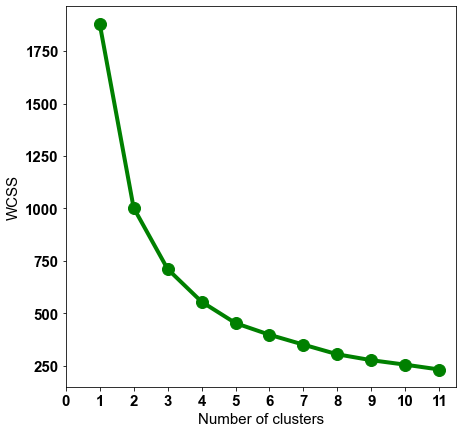

In [89]:
WCSS = []
for i in range(1,12):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_) #inertia --> error
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,12),WCSS, linewidth=4, markersize=12,marker='o',color = 'green')
plt.xticks(np.arange(12))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [90]:
model = KMeans(n_clusters = 5, init = "k-means++", max_iter = 300, n_init = 40, random_state = 0)
y_clusters = model.fit_predict(x)

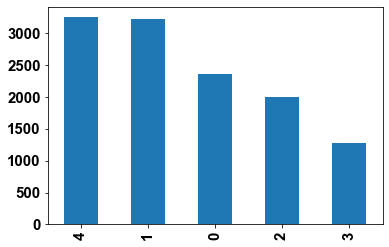

In [91]:
pd.Series(y_clusters).value_counts().plot(kind='bar');

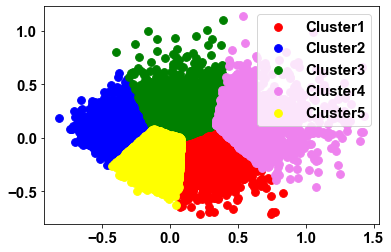

In [92]:
plt.scatter(x[y_clusters == 0, 0], x[y_clusters == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(x[y_clusters == 1, 0], x[y_clusters == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(x[y_clusters == 2, 0], x[y_clusters == 2, 1], s = 60, c = 'green', label = 'Cluster3')
plt.scatter(x[y_clusters == 3, 0], x[y_clusters == 3, 1], s = 60, c = 'violet', label = 'Cluster4')
plt.scatter(x[y_clusters == 4, 0], x[y_clusters == 4, 1], s = 60, c = 'yellow', label = 'Cluster5') 

plt.legend()
plt.show()

In [93]:
df['Label'] = y_clusters

In [94]:
plt.rcParams.update({'font.size': 12})

In [95]:
df['Label'].value_counts()

4    3245
1    3215
0    2360
2    1992
3    1269
Name: Label, dtype: int64

In [96]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [97]:
X_train , X_test ,y_train , y_test = train_test_split(X,y,train_size=.8,random_state=44)

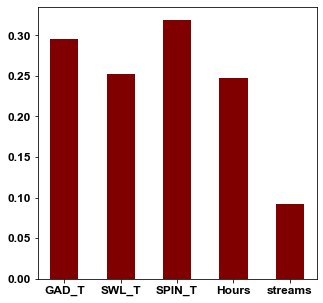

In [98]:
l1 = df[df['Label'] == 0]['GAD_T'].mean()
l2 = df[df['Label'] == 0]['SWL_T'].mean()
l3 = df[df['Label'] == 0]['SPIN_T'].mean()
l4 = df[df['Label'] == 0]['Hours'].mean()
l5 = df[df['Label'] == 0]['streams'].mean()

c=[l1,l2,l3,l4,l5]
plt.figure(figsize=(5,5))
plt.bar(['GAD_T','SWL_T','SPIN_T' ,'Hours' , 'streams'],c,color ='maroon',width = 0.5)
plt.show()

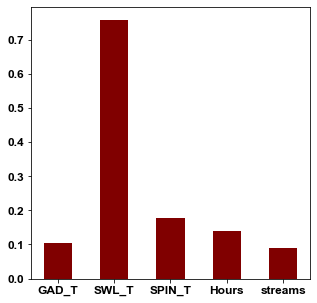

In [99]:
l1 = df[df['Label'] == 1]['GAD_T'].mean()
l2 = df[df['Label'] == 1]['SWL_T'].mean()
l3 = df[df['Label'] == 1]['SPIN_T'].mean()
l4 = df[df['Label'] == 1]['Hours'].mean()
l5 = df[df['Label'] == 1]['streams'].mean()

c=[l1,l2,l3,l4,l5]
plt.figure(figsize=(5,5))
plt.bar(['GAD_T','SWL_T','SPIN_T' ,'Hours' , 'streams'],c,color ='maroon',width = 0.5)
plt.show()

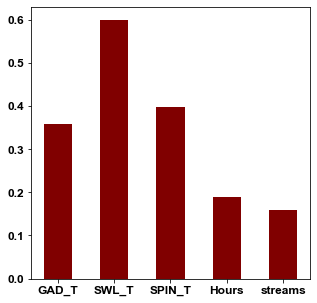

In [100]:
l1 = df[df['Label'] == 2]['GAD_T'].mean()
l2 = df[df['Label'] == 2]['SWL_T'].mean()
l3 = df[df['Label'] == 2]['SPIN_T'].mean()
l4 = df[df['Label'] == 2]['Hours'].mean()
l5 = df[df['Label'] == 2]['streams'].mean()

c=[l1,l2,l3,l4,l5]
plt.figure(figsize=(5,5))
plt.bar(['GAD_T','SWL_T','SPIN_T' ,'Hours' , 'streams'],c,color ='maroon',width = 0.5)
plt.show()

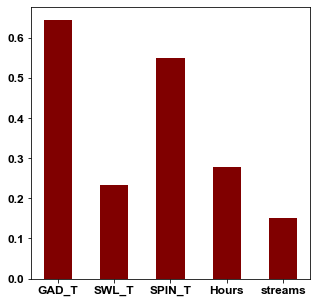

In [101]:
l1 = df[df['Label'] == 3]['GAD_T'].mean()
l2 = df[df['Label'] == 3]['SWL_T'].mean()
l3 = df[df['Label'] == 3]['SPIN_T'].mean()
l4 = df[df['Label'] == 3]['Hours'].mean()
l5 = df[df['Label'] == 3]['streams'].mean()

c=[l1,l2,l3,l4,l5]
plt.figure(figsize=(5,5))
plt.bar(['GAD_T','SWL_T','SPIN_T' ,'Hours' , 'streams'],c,color ='maroon',width = 0.5)
plt.show()

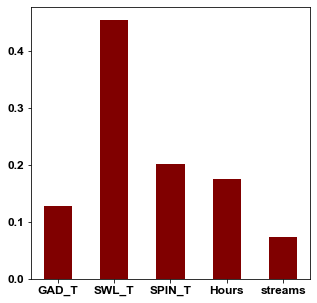

In [102]:
l1 = df[df['Label'] == 4]['GAD_T'].mean()
l2 = df[df['Label'] == 4]['SWL_T'].mean()
l3 = df[df['Label'] == 4]['SPIN_T'].mean()
l4 = df[df['Label'] == 4]['Hours'].mean()
l5 = df[df['Label'] == 4]['streams'].mean()

c=[l1,l2,l3,l4,l5]
plt.figure(figsize=(5,5))
plt.bar(['GAD_T','SWL_T','SPIN_T' ,'Hours' , 'streams'],c,color ='maroon',width = 0.5)
plt.show()

In [103]:
import tensorflow as tf
ac=[]
from tensorflow import keras
from tensorflow.keras import layers
x = layers.Input(shape=(12, 7)) 
cell = layers.SimpleRNNCell(3, activation='tanh')  
rnn = layers.RNN(cell)
rnn_output = rnn(x)
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(8,activation='relu',input_dim=48))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')
model.fit(X_train,y_train,epochs=5)
ac.append(accuracy_score(model,y_test,sample_weight=0.2)*100)

Epoch 1/5
302/302 [==============================] - 1s 2ms/step - loss: -67.2276
Epoch 2/5
302/302 [==============================] - 1s 2ms/step - loss: -429.6688
Epoch 3/5
302/302 [==============================] - 1s 2ms/step - loss: -1128.5280
Epoch 4/5
302/302 [==============================] - 1s 2ms/step - loss: -2134.9829
Epoch 5/5
302/302 [==============================] - 1s 2ms/step - loss: -3423.0281


In [104]:
from sklearn.svm import SVC
model=SVC(gamma='auto')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
ac.append(accuracy_score(y_pred,y_test,sample_weight=1)*100)

In [105]:
import pickle
f=open('model.pkl','rb')
model=pickle.load(f)
y_pred=model.predict(X_test)

the accuracy of RCNN is 97.27 and SVM is 96.33


,Agorithms,accuracy
0,RCNN,97.27
1,SVM,96.33


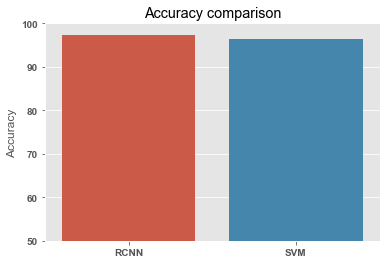

In [106]:
import numpy as np
import seaborn as sns
import matplotlib as plt

plt.style.use('ggplot')
x=['RCNN','SVM']
 
ax=sns.barplot(x,ac[:2])
ax.set_title('Accuracy comparison')
ax.set_ylabel('Accuracy')
#ax.yaxis.set_major_locator(ticker.LinearLocator())
print("the accuracy of {} is {} and {} is {}".format(x[0],ac[0],x[1],ac[1]))
ax.set_ylim(50,100)
import pandas as pd
data={'Agorithms':x,
     "accuracy":ac[:2]}
df=pd.DataFrame(data)
df.head()






In [107]:
for i in range (1,10):
    if(y_pred[i]==0):
        print("normal")
    elif(y_pred[i]==2):
        print("Social Phobia")
    else:
        print("general Anxiety")

Social Phobia
Social Phobia
normal
general Anxiety
general Anxiety
normal
general Anxiety
general Anxiety
general Anxiety
